# SNAPCHAT ADS-Testing and Prediction

In this project, there will be two parts:
* first part is focusing on the data cleaning, evaluating missingness based on permutation testing, and hypothesis testing.
* second part is concentrating on making prediction based on the dataset and trying to make a reliable model using sklearn.

## Part I Introduction: 
### basic exploration of dataset and performing tests
In this project, we focus on the question: what are the characteristics of ads with a large reach, i.e., many views? 

This dataset ads contains the information for political ads that are/have been served on Snapchat’s Advertising platform. It includes the data about how ADs manager choose the targeting criterias, what political info are included in those ads and the basic info about their content and consequences. 

In this dataset, we can get information about how did people response to those ads by looking at "impressions" column, which can be understanded as views. In order to ﬁnd the characteristics of ads with many impressions, we can do researches on associations between the impressions and spend, investigating how is spend related with ads' number of views.


### Cleaning and EDA 

In order to ﬁnd the characteristics of ads with many impressions, we care only about columns that are related to our impressions column. First, we concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years. Then we convert StartDate and EndDate into datetime. 

We want to check if there is a relationship between ads impressions and ads spending. But before we analyze the spend on the advertising, we need to convert the currency into a consistent form. We convert all currency into USD and add converted new spending to our original data. 

To do more analysis on ads spending, we ﬁrst use univariate analysis to investigate which currency is used the most in advertising, so we count the numbers of each kind of currency and plot it in a bar chart. The bar chart shows that USD is used the most in advertising compared to other currency. 

Next by bivariate analysis, we found the relationship between ads impressions and the spending on ads. By showing scatter plot, we can conclude that generally there is a positive relationship between ads impressions and spending. The more advertisers spend, the more numbers of times the ad has been viewed by Snapchatters. 

Then we analyzed average ads spending by currency by aggregates analysis. First, we grouped Currency Code using the mean of 'New_Spend', then plot it as a bar chart. We conclude from the graph that on average, AUD is spent more than other currencies, which is $3575.53. 

All of the above data cleaning and Exploratory Data Analysis give us more clues of ﬁnding characteristics of ads with many views and help us focus more on ads spending and other elements to investigate how to maximize ads' reach.

### Assessment of Missingness 

In this dataset, we found that 'segments' might be NMAR. Segments refers to targeting criteria used in the Ad. This is advertiser-speciﬁc data used such as Snap Audience Match or Lookalike audiences.Because we can not know fully from the observed data that why those data is missing and we might need further info to understand the missingness. In this case, if there is a data column representing the ﬁeld or specialization of those advertisers, we might be able to understand the missingness better and making it MAR.

We use permutation test to ﬁgure out the missingness of Region (Included). Region (Included) refers to targeting criteria used in the Ad. This is sub-country and often represents states or provinces. When this ﬁeld is populated Ad impressions will be delivered within the included Region(s). 

Firstly, We set up a null hypothesis that the missingness of region is not related to CandidateBallotInformation. CandidateBallotInformation refers to the name of the candidate/ ballot initiative associated with the Ad. We tried to ﬁnd whether two distributions are similar by accessing the total variation distance between these two categorical data. And we could know that p value is 0.434 which is larger than the statistical conﬁdence level 0.05 and we could not reject the null hypothesis in this case. Then we can conclude that the region included data is not related to/ not dependent on candidate ballot information. Because ads managers mostly just want to advertise for their camps in as many regions as possible, regions included might not related to the candiate ballot information. 

Secondly, We set up a null hypothesis that the missingness of region included data is not conditioned on the spend. We shuﬄed the column of spend and in each situmation we will get diﬀerent test statistic each time. We got two values in each situmation: one is the mean of spend when region data is missing, one is the mean of spend when region data is presented. And we take the abs diﬀerence btw these two values. Then we run our stimulations for 500 times and we got a empricial distribution about the diﬀerences in means. We got a histogram which can clearly give us information about the relationship between empricial distribution and observered value. Then we got the p-value which represent the proportion of diﬀ in means that is consistent with the observed value. According to our investigations, we found that the p value is 0.032. We set our statistical conﬁdence level as 0.05. As 0.036 is smaller than the 0.05, we could explain that these two distributions are not similar and reject the null hypothesis. In this case, we could say that the missingness of region included is dependent on the spend. 

Becuase of diﬀerent spending, ads manager might decide to put ads with higher spends into the regions which are larger than other states or put them into more regions. If the ad managers put data into many diﬀerent regions, they might not or forget to provide the targeting criteria data about included region. 

Since our question is about the characteristics of the ads with many impressions, we might not be able to draw direct conclusion from the missingness assessment here. But we still get valueable relations in this process.


### Hypothesis Test 

In order to probe deeper on what characteristics of ads maximize an ad's reach, we need to explore more on whether the impressions are inﬂuenced by the targeting countries. It is obvious that the United States takes the biggest proportion of being targeted. We are wondeirng if we can randomly choose countries from the populations, whether the result will be diﬀerent.

* Null Hypothesis: The average impressions of targeting United States is similar to the average impressions of targeting other countries.

* Alternative Hypothesis: No, the average impressions of targeting United States is totally diﬀerent from the average impressions of targeting other countries. 

We choose the average of impressions as our test statistics, and signiﬁcant level of 0.05.
The resulting p-value is 0.228, which is greater than our signiﬁcance level of 0.05. So, we fail to reject the null hypothesis that the average impressions of targeting United States is similar to the average impressions of targeting other countries.

## Code

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures 

### Cleaning and EDA
#### clean the data

First, we concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.


In [6]:
# Concatenate the 2018 CSV and the 2019 CSV into one DataFrame 
ads_2018 = pd.read_csv('ads_2018.csv') 
ads_2019 = pd.read_csv('ads_2019.csv') 
ads = pd.concat([ads_2018, ads_2019], ignore_index=True)
ads.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,https://www.snap.com/political-ads/asset/a213d...,USD,35,16678,2018/11/06 18:21:20Z,2018/11/07 01:19:08Z,Research Triangle Student Advocacy,US,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
1,5195d68c146526eda7c30c64b9bef15ae86d8250c9a226...,https://www.snap.com/political-ads/asset/5c0b7...,USD,6,4846,2018/12/01 17:37:10Z,2018/12/11 05:37:02Z,LPM,GB,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng/
2,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,USD,56,11770,2018/09/28 23:10:14Z,2018/10/17 02:00:00Z,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,Marital Status (Single),NaN,NaN,web_view_url:https://www.voterparticipation.or...
3,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,https://www.snap.com/political-ads/asset/4b9c0...,USD,2048,612521,2018/09/28 19:00:00Z,2018/10/27 03:59:00Z,Güd Marketing,"1223 Turner Ave., Suite 101,Lansing,48906,US",NaN,...,NaN,NaN,"Adventure Seekers,Beachgoers & Surfers,Cycling...",NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://blockasiancarp.org/take-a...
4,46d8326f706f56296fa29f51b5127c67190807ccc08534...,https://www.snap.com/political-ads/asset/f512d...,USD,196,23810,2018/10/26 17:58:01Z,2018/11/06 22:59:59Z,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://votingmatters.org/


In timestamp, the Z stands for the 'Zero timezone', as it is oﬀset by 0 from the Coordinated Universal Time (UTC) also known as "Zulu time"(UTC). So ﬁrst we need to check whether the timestamps in columns 'StartDate' and 'EndDate' are all in UTC time zone by checking how many non-null timestamps contain 'Z'.


In [8]:
# Check if all non-null 'StartDate' are in UTC time zone 
start = ads['StartDate'] 
num_utc_start = len([a for a in start if pd.isnull(a)==False and 'Z' in a]) 
num_null_start = ads['StartDate'].isnull().sum() 
num_utc_start + num_null_start == len(ads)

True

Now, we conﬁrmed that all timestamps are consistent and are in time zone of UTC. So, we can then convert StartDate and EndDate into datetime by stripping 'Z'.


In [10]:
# Stripping 'Z' at the end of each timestamp 
ads['StartDate'] = ads['StartDate'].apply(lambda x: x.strip('Z') if pd.isnull(x) ==False else x) 
ads['EndDate'] = ads['EndDate'].apply(lambda x: x.strip('Z') if pd.isnull(x)==False else x)

In [11]:
# convert StartDate and EndDate into datetime. 
ads['StartDate'] = pd.to_datetime(ads['StartDate']) 
ads['EndDate'] = pd.to_datetime(ads['EndDate'])

Before we analyze the spend on the advertising, we need to convert the currency into a consistent form. We will convert all currency into USD and add converted new spending to our original data.


In [13]:
# Convert different kinds of currency 
currency = {'USD':1, 'EUR':0.93, 'CAD':1.4, 'GBP':0.82, 'AUD':1.55} 
ads = ads.assign(Rate=ads['Currency Code'].map(currency)) 

pd.options.display.max_columns = 5 
# Add converted new spend to the original table 
ads['New_Spend'] = round(ads['Spend']/ads['Rate'],2) 
ads.head()

,ADID,CreativeUrl,...,Rate,New_Spend
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,https://www.snap.com/political-ads/asset/a213d...,...,1.0,35.0
1,5195d68c146526eda7c30c64b9bef15ae86d8250c9a226...,https://www.snap.com/political-ads/asset/5c0b7...,...,1.0,6.0
2,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,...,1.0,56.0
3,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,https://www.snap.com/political-ads/asset/4b9c0...,...,1.0,2048.0
4,46d8326f706f56296fa29f51b5127c67190807ccc08534...,https://www.snap.com/political-ads/asset/f512d...,...,1.0,196.0


#### Univariate Analysis 
We want to investigate which currency is used the most in advertising, so we count the numbers of each kind of currency and plot it in a bar chart. The bar chart shows that USD is used the most in advertising compared to other currency.


In [14]:
ads['Currency Code'].value_counts().to_frame().rename(columns={'Currency Code': 'counts'})

,counts
USD,2532
EUR,708
GBP,588
CAD,400
AUD,40


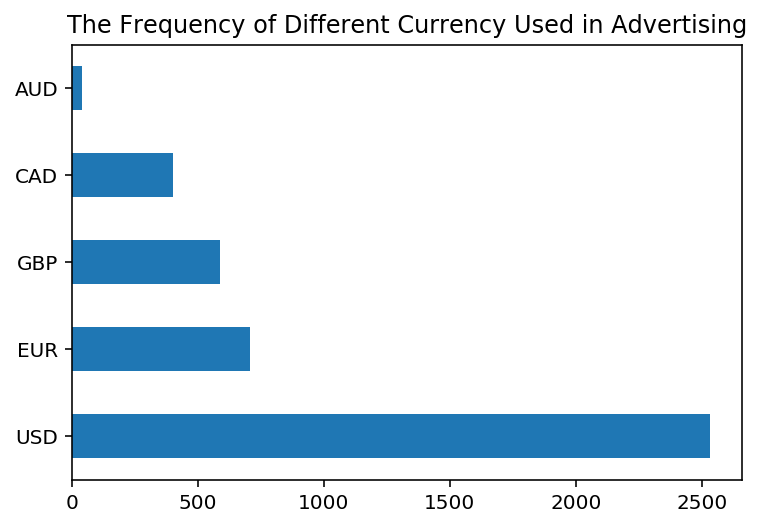

In [15]:
ads['Currency Code'].value_counts().plot(kind='barh', title='The Frequency of Different Currency Used in Advertising')

#### Bivariate Analysis 
We want to ﬁnd the relationship between ads impressions and the spending on ads. By showing scatter plot, we can conclude that generally there is a positive relationship between ads impressions and spending. The more advertisers spend, the more numbers of times the ad has been viewed by Snapchatters.

Text(0.5, 1.0, 'The Relationship Between Ads Impressions and Spending')

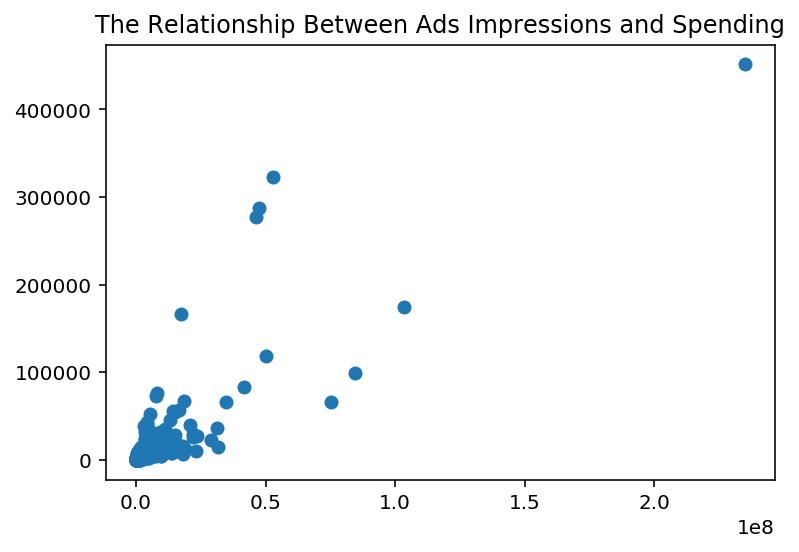

In [17]:
# Draw scatter plot to show the relationship between ads impressions and spendin g 
plt.scatter(ads['Impressions'], ads['New_Spend']) 
plt.title('The Relationship Between Ads Impressions and Spending')

#### Interesting Aggregates 
We want to analyze average ads spending by currency. First, we need to groupby Currency Code using the mean of 'New_Spend', then plot it as a bar chart. We can conclude from the graph that on average, AUD is spentmorethanothercurrencies. 

In [18]:
ads.groupby('Currency Code')['New_Spend'].mean().to_frame()

,New_Spend
Currency Code,
AUD,3575.532500
CAD,1554.565900
EUR,970.709703
GBP,855.539677
USD,1974.964060


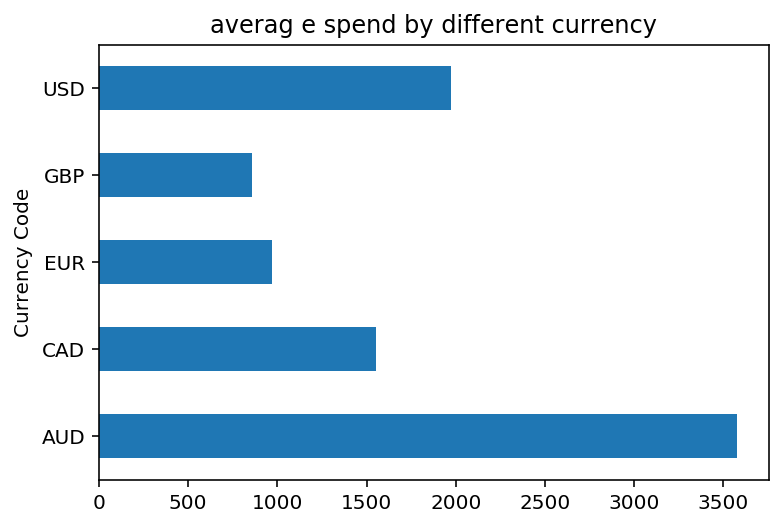

In [19]:
ads.groupby('Currency Code')['New_Spend'].mean().plot(kind='barh', title='averag e spend by different currency')

### Assessment of Missingness

In [32]:
# Clean the data and make it contain necessary information 
ad = ads.copy() 
ad = ad[['Currency Code','Impressions','New_Spend','CandidateBallotInformation', 'Regions (Included)']]

In [33]:
# Pick column "Regions (Included)" to analyze missingness 
ad['is_null'] = ad['Regions (Included)'].isnull()

#### Test Independence 
We pick column 'Regions (Included)' to analyze missingness and test if missingness is dependent on column 'CandidateBallotInformation'.


In [34]:
# conditinal empirical distribution of CandidateBallotInformation by null and no t-null 
distr = (    
    ad    
    .pivot_table(index='is_null', columns='CandidateBallotInformation', aggfunc= 'size')    
    .apply(lambda x:x / x.sum(), axis=1) 
) 
distr

CandidateBallotInformation,Aebischer,Bella Womens Center,...,Warren for President,William Stowell
is_null,,,,,
False,NaN,NaN,...,0.010417,0.010417
True,0.006329,0.00211,...,0.242616,NaN


In [35]:
# Calculate observed obs 
obs = distr.diff().iloc[-1].abs().sum() / 2 
obs

0.1307357594936709

In [37]:
# Conduct permutation test with 500 repetitions 
n_repetitions = 500 
tvds = [] 

for _ in range(n_repetitions):       
    # shuffle the gender column    
    shuffled_col = (        
        ad['CandidateBallotInformation']        
        .sample(replace=False, frac=1)        
        .reset_index(drop=True)    
    )   
    
    # put them in a table    
    shuffled = (        
        ad        
        .assign(**{            
            'CandidateBallotInformation': shuffled_col,            
            'is_null': ads['Regions (Included)'].isnull()        
        })    
    )        
    
    # compute the tvd    
    shuffled = (        
        shuffled        
        .pivot_table(index='is_null', columns='CandidateBallotInformation', aggfunc='size')        
        .apply(lambda x:x / x.sum(), axis=1)    
    )   
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2  
    
    # add it to the list of results
    tvds.append(tvd)

0.412

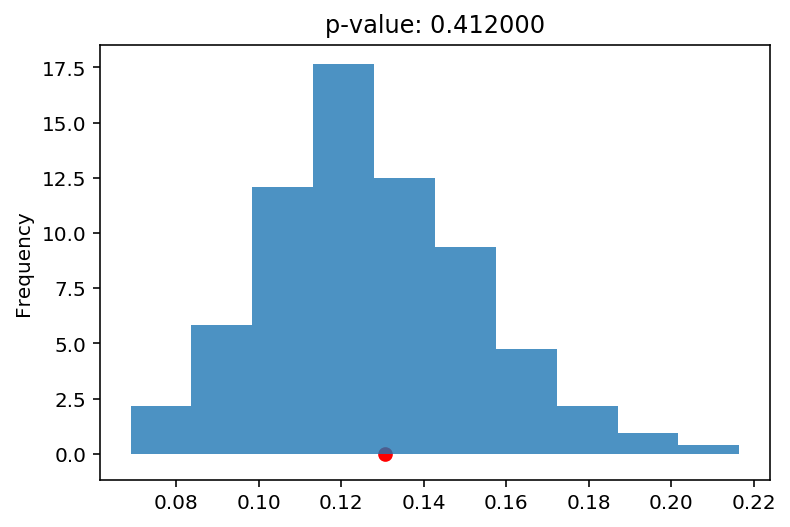

In [38]:
# Calculate pval with significant level of 0.05 
pval = np.mean(tvds > obs) 
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval) 
plt.scatter(obs, 0, color='red', s=40); 
pval

Since pval is greater than 0.05, we fail to reject null hypothesis. 

Then we can conclude that the region included data is not related to/ not dependent on candidate ballot information. Because ads managers mostly just want to advertise for their camps in as many regions as possible, regions included might not related to the candiate ballot information.


#### Test Dependence
We pick column 'Regions (Included)' to analyze missingness and test if missingness is dependent on column 'New_Spend'.


In [40]:
# Pick column Regions (Included) to analyze missingness 
ad['is_null'] = ad['Regions (Included)'].isnull()

is_null
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: New_Spend, dtype: object

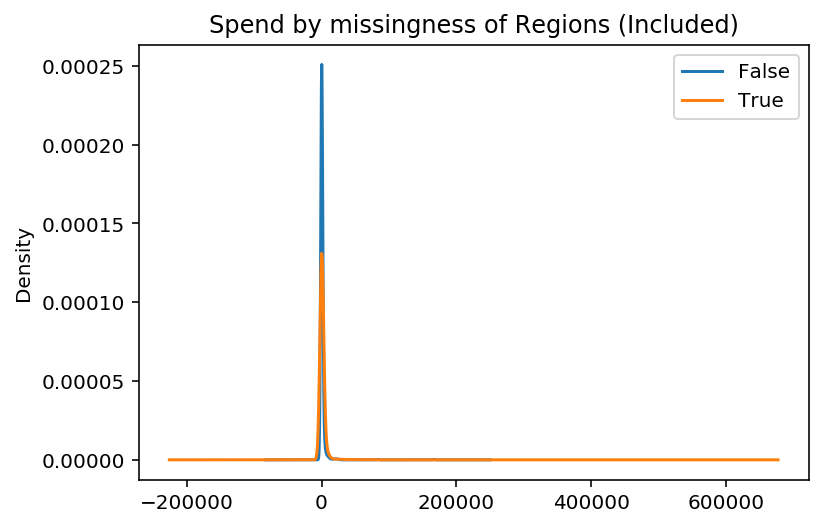

In [41]:
# Draw graph of spend by the missingess of Regions (Included) 
ad.groupby('is_null').New_Spend.plot(kind='kde', legend=True,  title='Spend by missingness of Regions (Included)')

In [42]:
# Find observed value by calculate difference of means and use it as our statistic 
obs2 = ad.groupby('is_null')['New_Spend'].mean().diff().abs().iloc[-1] 
obs2

859.8275235610192

In [43]:
# Conduct permutation test and append all means from 500 repetitions 
n_repetitions = 500 
means = [] 

for _ in range(n_repetitions):       
    # shuffle the gender column    
    shuffled_col = (        
        ad['New_Spend']        
        .sample(replace=False, frac=1)        
        .reset_index(drop=True)    
    )        
    
    # put them in a table    
    shuffled = (        
        ad        
        .assign(**{            
            'New_Spend': shuffled_col,            
            'is_null': ad['Regions (Included)'].isnull()        
        })    
    )     
    
    # compute the differences in means    
    mean = shuffled.groupby('is_null')['New_Spend'].mean().diff().abs().iloc[-1]    
    means.append(mean)

0.018

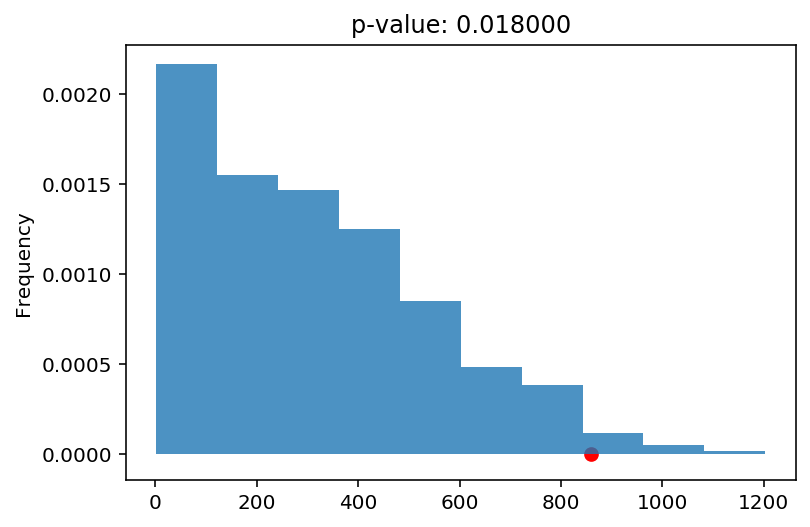

In [44]:
# Calculate pval with significance level of 0.05 
pval2 = np.mean(means >= obs2) 
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval2) 
plt.scatter(obs2, 0, color='red', s=40) 
pval2 

As 0.036 is smaller than the 0.05, we could explain that these two distributions are not similar and reject the null hypothesis. In this case, we could say that the missingness of region included is dependent on the spend. 

Becuase of diﬀerent spending, ads manager might decide to put ads with higher spends into the regions which are larger than other states or put them into more regions. If the ad managers put data into many diﬀerent regions, they might not or forget to provide the targeting criteria data about included region. 

Since our question is about the characteristics of the ads with many impressions, we might not be able to draw direct conclusion from the missingness assessment here. But we still get valueable relations in this process.

### Hypothesis Test 
In order to probe deeper on what characteristics of ads maximize an ad's reach, we need to explore more on whether the impressions are inﬂuenced by the targeting countries. It is obvious that the United States takes the biggest proportion of being targeted. We are wondeirng if we can randomly choose countries from the populations, whether the result will be diﬀerent. 

* Null Hypothesis: The average impressions of targeting United States is similar to the average impressions of targeting other countries. 

* Alternative Hypothesis: No, the average impressions of targeting United States is totally diﬀerent from the average impressions of targeting other countries. 

We choose the average of impressions as out test statistics, and signiﬁcant level of 0.05.

In [45]:
# Get the number of CountryCode which is united states 
usa_size = ads.loc[ads['CountryCode'] == 'united states'].shape[0] 
usa_size

2287

In [46]:
# Get the number of CountryCode which is not united states (rest of countries) 
other_size = ads.loc[ads['CountryCode'] != 'united states'].shape[0] 
other_size

1981

In [47]:
# Use the average of Impressions as the test statistics, 
# calculate the average of Impressions of CountryCode which is united states 
observed_avg = ads.loc[ads['CountryCode'] == 'united states', 'Impressions'].mean() 
observed_avg

761441.0179274158

In [48]:
# Conduct null hypothesis by sampling uniformly with the size of united states 
N_trials =  1000 
averages = [] 

for i in np.arange(N_trials):    
    random_sample = ads.sample(int(usa_size), replace=False)    
    new_average = np.mean(random_sample['Impressions'])    
    averages.append(new_average)     

averages = np.array(averages)

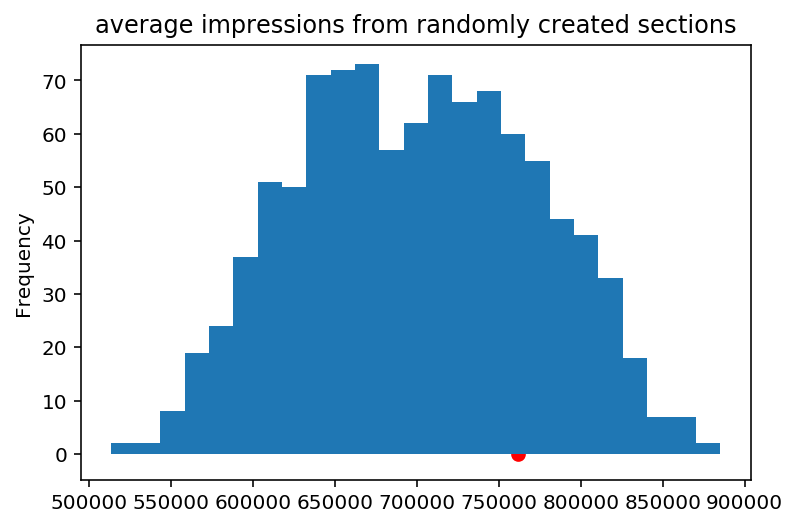

In [49]:
# Plot the result distribution 
pd.Series(averages, name='Average').plot(    
    kind='hist',     
    bins=25,    
    title = 'average impressions from randomly created sections' 
) 
plt.scatter(observed_avg, 0, color='red', s=40)

In [50]:
# Calculate the pval of the null hypithesis with significance level of 0.05 
pval3 = np.count_nonzero(averages >= observed_avg) / N_trials 
pval3

0.22

The resulting p-value is 0.22, which is greater than our signiﬁcance level 0.05. So, we fail to reject the null hypothesis that the average impressions of targeting United States is similar to the average impressions of targeting other countries. Knowing this can help us understand that there is no diﬀerence to target the United States and other countries in order to maximize ad's reach, although the United States is the most targeting country to deliver ads.

## Part 2 Introduction: 
### predictions and modeling

The prediction problem for our project is that: how can we make a good prediction of spending by
advertisers over the campaign? We need to determine the features to use and develop suitable models for
prediction. We used a regression model to do experiments on different features and see what features can
be applied to the prediction of “new_spend”. Our target variable is new_spend, which is the amount (In local
currency) spent by the advertiser over the campaign (up to the current date) and modified by their currency
rate against dollars. In order to justify our final model (compare to the baseline model), we chose to use r
square score (objective) to see if the model and features are applicable. R square is the coefficient of
determination, which represents the proportion of the variance for a dependent variable that's explained by
an independent variable or variables in a regression model. In this case, higher r square value refers to better fit into the data (better model, engineering for features).

### Baseline Model 
The number of features we choose from our baseline model are four features: “Region”, “Gender”, “CandidateBallotInformation” and “Language”. The ﬁrst three are nominal features and the last one is a quantitative feature. By choosing “Region” column, we want to investigate whether the targeting regions for ads will inﬂuence the spending on Ads. And for “Genders”, we want to see if there is a relationship between targeting genders for Ads and the spending on Ads. At last, we choose “CandidateBallotInformation” to ﬁnd whether there is a correlation that whether providing candidate information in Ads or not will inﬂuence the Spending in Ads. We plan to choose these variables because we want to see if categorical data play an important role in relation with our targeting variable, so we just ignore other numerical data. And also choosing a quantitative data type is helpful for us to investigate which quantitative data improve our model the most. 

For the “Region” column, we assign each value from the “CountryCode” column with the relative region name. For example, we assign “united states” with “NA” which stands for “North America”. Based on the “CountryCode” column, we ﬁnd there are six unique region values in our new “Region” column, which are “North America”, “Africa”, “Europe”, “Asia”, “Oceania” (we abbreviate it as “AU”) and “South America”. For “Gender” column, we impute null value as “BOTH”, since If it is empty, then it is targeting all genders. For the “CandidateBallotInformation” column, we mark the null value as 0 and the others to be 1, since if there is the name of the candidate/ ballot initiative associated with the Ad, we want to count it in our model. And the “Language” column is originally a nominal type, we change it to numerical feature by counting how many languages it is targeting in Ads. 

In our baseline model, we want to ﬁnd the relationship between our targeting variable -- Spending on the Ad and the targeting regions, genders, languages and candidate information, so we train our baseline model with a pipeline of one-coding, standard scaler, and linear regression. By using train_test_split method and calculate R-score, which measures the strength of the relationship between the model and the targeting variable on a convenient 0 – 100% scale, we conclude that a model does not really explain the variation in the response variable around its mean. Since the outcome of R-square is relatively small, we think it is not good for our prediction. We can say that there is little relationship (or the relation is not so obvious) between the spending on Ad and the features we choose, which are “Region”, “Genders”, “CandidateBallotInformation” and “Language”.

### Final Model
In our ﬁnal model, we want to add other features which include numerical features like “Impressions” and “Interests”. We think numerical data like “Impressions” and “Interests” have a closer relationship with our targeting quantitative data “New_Spend”. For example, “Impressions” means the number of times the Ad has been viewed by Snapchatters. The data itself is totally random ranging from a very small number to a very large number, so from a macroscopic view, we can see if there is a relationship between our features and the targeting variable. 

The model type we choose is K-Nearest Neighbors regressor. We also test the linear regression, but we ﬁnd that the R^2 score for the ideal possible k-nearest neighbors regressor is higher than that for linear regression. And the parameter(n_neighbors) that ended up performing the best is 4 because it has the highest R^2 score, and it has a strongest relationship with our targeting data. The method we choose for the model selection is to train and test data, compare the R^2 score, and ﬁnd the parameters with the highest R^2 score. We choose K-Nearest Neighbors rather than Linear Regression also because K-Nearest Neighbors are more ﬂexible since we can choose parameters to get diﬀerent R^2 scores. 

We use column transformers to train our diﬀerent types of data. We train our newly added features “Impressions” and “Interests” using RobustScalar() since this kind of scalar is typically done by removing the mean and scaling to unit variance, which can avoid the inﬂuence by the outlier. We also want to pass other parameters just to see whether other parameters also have the relationship with the spending on Ads. After ﬁtting and training our data, we ﬁnd that the resulting R^2 score has greatly improved compared to our baseline model, which is around 0.5. Also, we use for-loop to get a column of R^2 and ﬁnd the best parameter using idxmax(), which is 2. So, we can conclude that “Impressions” and “Interests” (especially “Impressions”) such numerical features perform the best in our model, which we can say that there is a stronger relationship between the views of the Ads by users and the spending on Ads, and the best parameter is 2 in this case. More speciﬁcally, spending more on Ads may result in more views in Ads.


### Fairness Evaluation 
In order to evaluate the fairness of our model, we picked the subset of the data: “New_Spend”, which is the amount (In local currency) spent by the advertiser over the campaign (up to the current date) and modiﬁed by their currency rate against dollars. And we created two attributes for this subset: large and small. Large is for part of data which new_spend is greater than the mean of the new_spend, whereas small refers to where new_spend is smaller than the mean of the new_spend. Then we run a permutation test to see if our ﬁnal model performs “fairly” on these two attributes. Our null hypothesis is that the ﬁnal model performs fairly on these two attributes, which means that this model is “fair”. The observed statistic will be the diﬀerence between the R^2 score of the modeling on these two attributes. And test statistics would be the diﬀerence between the R^2 score of the modeling on these two attributes. Then we got the p value 1.0 and chose the signiﬁcance level 0.01. In this case, we fail to reject the null hypothesis. 

For the parity measure we use, because we are doing linear regression in our ﬁnal model, it doesn’t make sense to use accuracy as accuracy for regressors would almost always be 0 or very close to 0 since it is hard to predict the exact continued value. Then we chose to use the R^2 score to measure the fairness of our model. R square is the coeﬃcient of determination, which represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. In this case, if we compare the r square for these two attributes, we can tell whether our model ﬁts into these two attributes well to similar extent.


### Code

In [1]:
# import sklearn packages 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import FunctionTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
import sklearn.ensemble as es 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import RobustScaler 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score 
from sklearn import metrics

In [55]:
# read data 
ads_2018 = pd.read_csv('ads_2018.csv') 
ads_2019 = pd.read_csv('ads_2019.csv') 
ads = pd.concat([ads_2018, ads_2019], ignore_index=True) 
ads.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,https://www.snap.com/political-ads/asset/a213d...,USD,35,16678,2018/11/06 18:21:20Z,2018/11/07 01:19:08Z,Research Triangle Student Advocacy,US,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
1,5195d68c146526eda7c30c64b9bef15ae86d8250c9a226...,https://www.snap.com/political-ads/asset/5c0b7...,USD,6,4846,2018/12/01 17:37:10Z,2018/12/11 05:37:02Z,LPM,GB,NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng/
2,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,USD,56,11770,2018/09/28 23:10:14Z,2018/10/17 02:00:00Z,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,...,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,Marital Status (Single),NaN,NaN,web_view_url:https://www.voterparticipation.or...
3,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,https://www.snap.com/political-ads/asset/4b9c0...,USD,2048,612521,2018/09/28 19:00:00Z,2018/10/27 03:59:00Z,Güd Marketing,"1223 Turner Ave., Suite 101,Lansing,48906,US",NaN,...,NaN,NaN,"Adventure Seekers,Beachgoers & Surfers,Cycling...",NaN,Provided by Advertiser,en,NaN,NaN,NaN,web_view_url:https://blockasiancarp.org/take-a...
4,46d8326f706f56296fa29f51b5127c67190807ccc08534...,https://www.snap.com/political-ads/asset/f512d...,USD,196,23810,2018/10/26 17:58:01Z,2018/11/06 22:59:59Z,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:http://votingmatters.org/


In [56]:
# data cleaning 
# convert currency to USD 
currency = {'USD':1, 'EUR':0.93, 'CAD':1.4, 'GBP':0.82, 'AUD':1.55} 
ads = ads.assign(Rate=ads['Currency Code'].map(currency)) 

# classify CountryCode 
region = {'united states':'NA', 'nigeria':'AF', 'norway':'EU', 'canada':'NA', 'netherlands':'EU',           
          'iraq':'AS', 'united kingdom':'EU', 'switzerland':'EU', 'sweden':'EU', 'denmark':'EU',           
          'australia':'AU', 'belgium':'EU', 'ireland':'EU', 'france':'EU', 'south africa':'AF',           
          'austria':'EU', 'finland':'EU', 'turkey':'AS', 'kuwait':'AS', 'puerto rico':'NA',           
          'india':'AS', 'poland':'EU', 'chile':'SA', 'argentina':'SA','germany': 'EU',           
          'united arab emirates':'AS', 'lithuania':'EU', 'new zealand':'AU', 'brazil':'SA'} 

# add Region column 
ads = ads.assign(Region=ads['CountryCode'].map(region)) 

# add converted spend column 
ads['New_Spend'] = round(ads['Spend']/ads['Rate'],2)

In [57]:
# convert Language column to be the count of language 
ads['Language'] = ads['Language'].apply(lambda x: len(x.split(',')) if pd.isnull (x) ==False else 0)

In [58]:
# convert Interests column to be the count of interests 
ads['Interests'] = ads['Interests'].fillna(0) 
ads['Interests'] = ads['Interests'].apply(lambda x: len(x.split(',')) if type(x) is not int else 0)

In [59]:
# Impute BOTH to Gender column 
ads['Gender'] = ads['Gender'].fillna('BOTH')

In [60]:
# convert CandidateBallotInformation be to a boolean column 
ads['CandidateBallotInformation'] = ads['CandidateBallotInformation'].fillna(0) 
ads['CandidateBallotInformation'] = ads['CandidateBallotInformation'].apply(lambda x: 1 if x is not 0 else 0)

In [61]:
ads.head()

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,...,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties,Rate,Region,New_Spend
0,6f6f6abb25d183bc3f0a2df46d18c65a18f6e1cac73416...,https://www.snap.com/political-ads/asset/a213d...,USD,35,16678,2018/11/06 18:21:20Z,2018/11/07 01:19:08Z,Research Triangle Student Advocacy,US,0,...,NaN,Provided by Advertiser,0,NaN,NaN,NaN,NaN,1.0,NA,35.0
1,5195d68c146526eda7c30c64b9bef15ae86d8250c9a226...,https://www.snap.com/political-ads/asset/5c0b7...,USD,6,4846,2018/12/01 17:37:10Z,2018/12/11 05:37:02Z,LPM,GB,0,...,NaN,Provided by Advertiser,0,NaN,NaN,NaN,web_view_url:http://jidesanwoolu.ng/,1.0,AF,6.0
2,64d906646b616c034c91b69b9e7851944844eb456dd203...,https://www.snap.com/political-ads/asset/e56c0...,USD,56,11770,2018/09/28 23:10:14Z,2018/10/17 02:00:00Z,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",0,...,NaN,Provided by Advertiser,0,Marital Status (Single),NaN,NaN,web_view_url:https://www.voterparticipation.or...,1.0,NA,56.0
3,45d7697e2522ccdd56b699e832792b9b659f7159e180a2...,https://www.snap.com/political-ads/asset/4b9c0...,USD,2048,612521,2018/09/28 19:00:00Z,2018/10/27 03:59:00Z,Güd Marketing,"1223 Turner Ave., Suite 101,Lansing,48906,US",0,...,NaN,Provided by Advertiser,1,NaN,NaN,NaN,web_view_url:https://blockasiancarp.org/take-a...,1.0,NA,2048.0
4,46d8326f706f56296fa29f51b5127c67190807ccc08534...,https://www.snap.com/political-ads/asset/f512d...,USD,196,23810,2018/10/26 17:58:01Z,2018/11/06 22:59:59Z,Mothership Strategies,"1328 Florida Avenue NW, Building C, Washington...",0,...,NaN,NaN,0,NaN,NaN,NaN,web_view_url:http://votingmatters.org/,1.0,NA,196.0


### Baseline Model

In [63]:
# get features we want 
ad = ads[['Region','CandidateBallotInformation','Impressions','Interests','Language','Gender','New_Spend']] 

# onehotencoding nominal columns 
gd_col = ['Gender', 'Region', 'CandidateBallotInformation'] 
gd_transformer = Pipeline([('onehot', OneHotEncoder())]) 

scl_col = ['Language'] 
scl_transformer = Pipeline(steps=[('trans', StandardScaler())]) 
preproc = ColumnTransformer([('gd', gd_transformer, gd_col),
                  ('std', scl_transformer, scl_col)]) 

#create the pipeline 
pl = Pipeline([('preprocessor', preproc), 
               ('regressor', LinearRegression())]) 

# fit the data and calculate the prediction 
pl.fit(ad.drop('New_Spend', axis=1), ad.New_Spend) 
preds = pl.predict(ad.drop('New_Spend', axis=1)) 
preds

array([ 611.25, -879.75,  611.25, ..., 2874.75,  450.25, 2874.75])

In [65]:
# train_test_split our data and calculate r2 score 
X = ad.drop('New_Spend', axis=1) 
y = ad.New_Spend 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
pl.fit(X_train, y_train) 
y_pred = pl.predict(X_test) 
r2_score(y_test, y_pred)

0.002844861325309478

Since the outcome of R-square is relatively small, we think it is not good for our prediction. We can say that there is little relationship (or the relation is not so obvious) between the spending on Ad and the features we choose, which are “Region”, “Genders”, “CandidateBallotInformation” and "Language".

### Final Model

In [69]:
# get features we want 
ad = ads[['Region','CandidateBallotInformation','Impressions','Interests','Language','Gender','New_Spend']] 

# scale the numerical data 
scl_col = ['Impressions','Interests'] 
scl_transformer = Pipeline(steps=[('trans', RobustScaler())]) 

# onehotencoding nominal columns 
gd_col = ['Gender','Region','CandidateBallotInformation'] 
gd_transformer = Pipeline(steps=[      
    ('onehot', OneHotEncoder())      
]) 

preproc = ColumnTransformer(    
    transformers=[('gd', gd_transformer, gd_col),('scl', scl_transformer, scl_col)
                 ], remainder='passthrough') 

pl = Pipeline(steps=[('preprocessor', preproc), 
                     ('regressor',LinearRegression())]) 

pl.fit(X_train, y_train) 
y_preds = pl.predict(X_test) 
r_score = r2_score(y_test, y_preds) 
r_score 

0.9455670977549646

In [73]:
# get features we want 
ad = ads[['Region','CandidateBallotInformation','Impressions','Interests','Language','Gender','New_Spend']] 

# scale the numerical data 
scl_col = ['Impressions','Interests'] 
scl_transformer = Pipeline(steps=[('trans', RobustScaler())]) 

# onehotencoding nominal columns 
gd_col = ['Gender','Region','CandidateBallotInformation'] 
gd_transformer = Pipeline(steps=[      
    ('onehot', OneHotEncoder())      
]) 

preproc = ColumnTransformer(    
    transformers=[('gd', gd_transformer, gd_col),('scl', scl_transformer, scl_col)                 
                 ], remainder='passthrough') 

#create the pipeline 
lst = [] 

for i in range(1,21):    
    pl = Pipeline(steps=[('preprocessor', preproc), ('regressor',KNeighborsRegressor(n_neighbors=i))])    
    pl.fit(X_train, y_train)    
    y_preds = pl.predict(X_test)    
    r_score = r2_score(y_test, y_preds)    
    lst.append(r_score)     

# create a dataframe of r^score 
df = pd.DataFrame(index=range(1,21)) 
df = df.assign(r2=lst) 
df.head()

,r2
1,0.450567
2,0.391477
3,0.338950
4,0.545494
5,0.644925


In [74]:
# get the best parameter 
df.r2.idxmax()

6

In [75]:
# get the average of r^2 
df.mean()

r2    0.502345
dtype: float64

So, we can conclude that “Impressions” and “Interests” (especially “Impressions”) such numerical features perform the best in our model, which we can say that there is a stronger relationship between the views of the Ads by users and the spending on Ads, and the best parameter is 4 in this case. More speciﬁcally, spending more on Ads may result in more views in Ads.

### Fairness Evaluation
Null hypothesis: ﬁnal model performs fairly on two attributes, large and small, which means that this model is “fair”. 

large is for part of data which new_spend is greater than the mean of the new_spend. 

Small refers to where new_spend is smaller than the mean of the new_spend.


In [76]:
pl = Pipeline(steps=[('preprocessor', preproc), ('regressor',KNeighborsRegressor (n_neighbors=3))]) 
pl.fit(ad.drop('New_Spend', axis=1), ad.New_Spend) 
preds = pl.predict(ad.drop('New_Spend', axis=1)) 
preds

array([5.33333333e+01, 5.00000000e+01, 5.80000000e+01, ...,
       2.22561900e+04, 1.21950000e+02, 9.00000000e+00])

In [97]:
# get attributes large and small from subset new_spend 
results = ad.copy()[['New_Spend']]

# put in prediction from the final model 
results['prediction'] = preds 

# attributes are classified by median of new_spend column 
median = np.median(results.New_Spend) 

# is_large column contain the label for shuffling in permutation test 
results['is_large'] = (results.New_Spend <= median).replace({True:'Small', False: 'Large'}) 
results.head()

,New_Spend,prediction,is_large
0,35.0,53.333333,Small
1,6.0,50.000000,Small
2,56.0,58.000000,Small
3,2048.0,3104.333333,Large
4,196.0,132.333333,Large


In [98]:
# R^2 Parity 
# get the groupby df which contains the median of r2 scores for two attributes 
(    
    results    
    .groupby('is_large')    
    .apply(lambda x: metrics.r2_score(x.New_Spend, x.prediction))    
    .rename('r2_score')    
    .to_frame() 
)

,r2_score
is_large,
Large,0.781948
Small,-0.876545


0.0


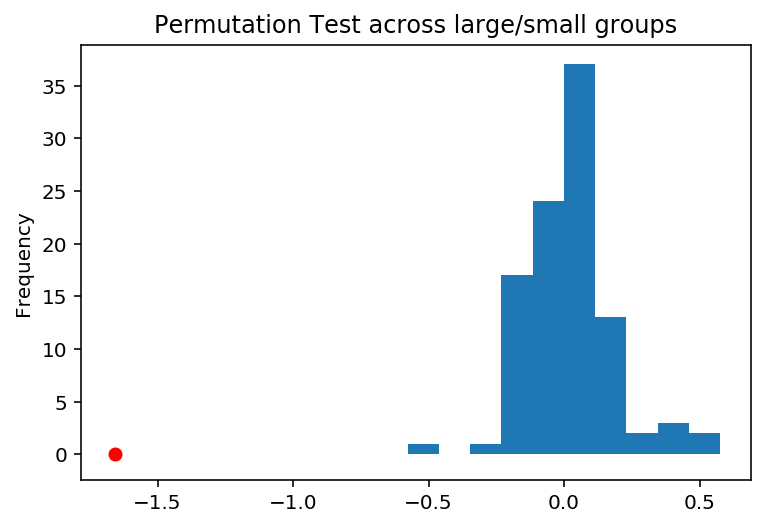

In [99]:
# The observed statistic will be the difference between the r2 score of the mode ling on these two attributes. 
obs = results.groupby('is_large').apply(lambda x: metrics.r2_score(x.New_Spend, x.prediction)).diff().iloc[-1] 
metrs = [] 

# test statistics would be the difference between the r2 score of the modeling on these two attributes. 

for _ in range(100):    
    s = (        
        results[['is_large', 'prediction', 'New_Spend']]        
        .assign(is_large=results.is_large.sample(frac=1.0, replace=False).reset_index(drop=True))        
        .groupby('is_large')        
        .apply(lambda x: metrics.r2_score(x.New_Spend, x.prediction))          
        .diff()        
        .iloc[-1]    
    )        
    
    metrs.append(s) 
    
# get the p value for permutation test 
print(pd.Series(metrs <= obs).mean()) 
pd.Series(metrs).plot(kind='hist', title='Permutation Test across large/small groups') 
plt.scatter(obs, 0, c='r');

Then we got the p value 0.0 and chose the signiﬁcance level 0.01. In this case, we should reject the null hypothesis.

Things to improve

1. To find if there are outliers or any real life issue related to the data exploring
2. To find a better regression model for the features chose